In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [45]:
data = pd.read_csv('Data_clean.csv')
print(data.columns)

Index(['accident_index', 'speed_limit', 'urban_or_rural_area',
       'local_authority_name', 'accident_count', 'traffic_flow',
       'accident_rate', 'population_density', 'mean_income_of_tax_payers',
       'total_road_length', 'Inland_Area', 'Road_Network_Density',
       'Signal_Count', 'Driving_Distance'],
      dtype='object')


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22883 entries, 0 to 22882
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accident_index             22883 non-null  float64
 1   speed_limit                22883 non-null  int64  
 2   urban_or_rural_area        22883 non-null  int64  
 3   local_authority_name       22883 non-null  object 
 4   accident_count             22883 non-null  int64  
 5   traffic_flow               22883 non-null  int64  
 6   accident_rate              22883 non-null  float64
 7   population_density         22883 non-null  float64
 8   mean_income_of_tax_payers  22236 non-null  float64
 9   total_road_length          22883 non-null  float64
 10  Inland_Area                22883 non-null  float64
 11  Road_Network_Density       22883 non-null  float64
 12  Signal_Count               22711 non-null  float64
 13  Driving_Distance           22883 non-null  int

In [47]:
# 删除不需要的列
columns_to_drop = ['accident_index', 'speed_limit', 'urban_or_rural_area', 'total_road_length', 'Inland_Area']
df_cleaned = data.drop(columns=columns_to_drop)

# 按 'local_authority_name' 去除重复行，保留每个区域的唯一记录
df_unique = df_cleaned.drop_duplicates(subset='local_authority_name')

# 查看结果
print(df_unique.head())

      local_authority_name  accident_count  traffic_flow  accident_rate  \
0     Barking and Dagenham             442        332152       0.001331   
442                 Barnet             829       1421345       0.000583   
1271                Bexley             395        817061       0.000483   
1666                 Brent             934        701496       0.001331   
2600               Bromley             598        631376       0.000947   

      population_density  mean_income_of_tax_payers  Road_Network_Density  \
0                 6286.4                    31800.0              5.896200   
442               4821.9                    59100.0              5.486005   
1271              4295.6                    38000.0              5.645334   
1666              8112.3                    44100.0              6.668517   
2600              2299.4                    54500.0              3.781264   

      Signal_Count  Driving_Distance  
0            454.0               634  
442     

In [49]:
# 使用 .loc 进行操作
df_unique.loc[:, 'accident_rate_percentage'] = df_unique['accident_rate'] * 100

In [50]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 21653
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   local_authority_name       33 non-null     object 
 1   accident_count             33 non-null     int64  
 2   traffic_flow               33 non-null     int64  
 3   accident_rate              33 non-null     float64
 4   population_density         33 non-null     float64
 5   mean_income_of_tax_payers  31 non-null     float64
 6   Road_Network_Density       33 non-null     float64
 7   Signal_Count               32 non-null     float64
 8   Driving_Distance           33 non-null     int64  
 9   accident_rate_percentage   33 non-null     float64
dtypes: float64(6), int64(3), object(1)
memory usage: 2.8+ KB


In [51]:
print(df_unique.columns)

Index(['local_authority_name', 'accident_count', 'traffic_flow',
       'accident_rate', 'population_density', 'mean_income_of_tax_payers',
       'Road_Network_Density', 'Signal_Count', 'Driving_Distance',
       'accident_rate_percentage'],
      dtype='object')


In [52]:
df_unique = df_unique.drop(columns = ['local_authority_name','accident_rate','accident_count'])

In [53]:
print(df_unique.columns)

Index(['traffic_flow', 'population_density', 'mean_income_of_tax_payers',
       'Road_Network_Density', 'Signal_Count', 'Driving_Distance',
       'accident_rate_percentage'],
      dtype='object')


In [54]:
df_unique = df_unique.dropna()

In [55]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 21653
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   traffic_flow               30 non-null     int64  
 1   population_density         30 non-null     float64
 2   mean_income_of_tax_payers  30 non-null     float64
 3   Road_Network_Density       30 non-null     float64
 4   Signal_Count               30 non-null     float64
 5   Driving_Distance           30 non-null     int64  
 6   accident_rate_percentage   30 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.9 KB


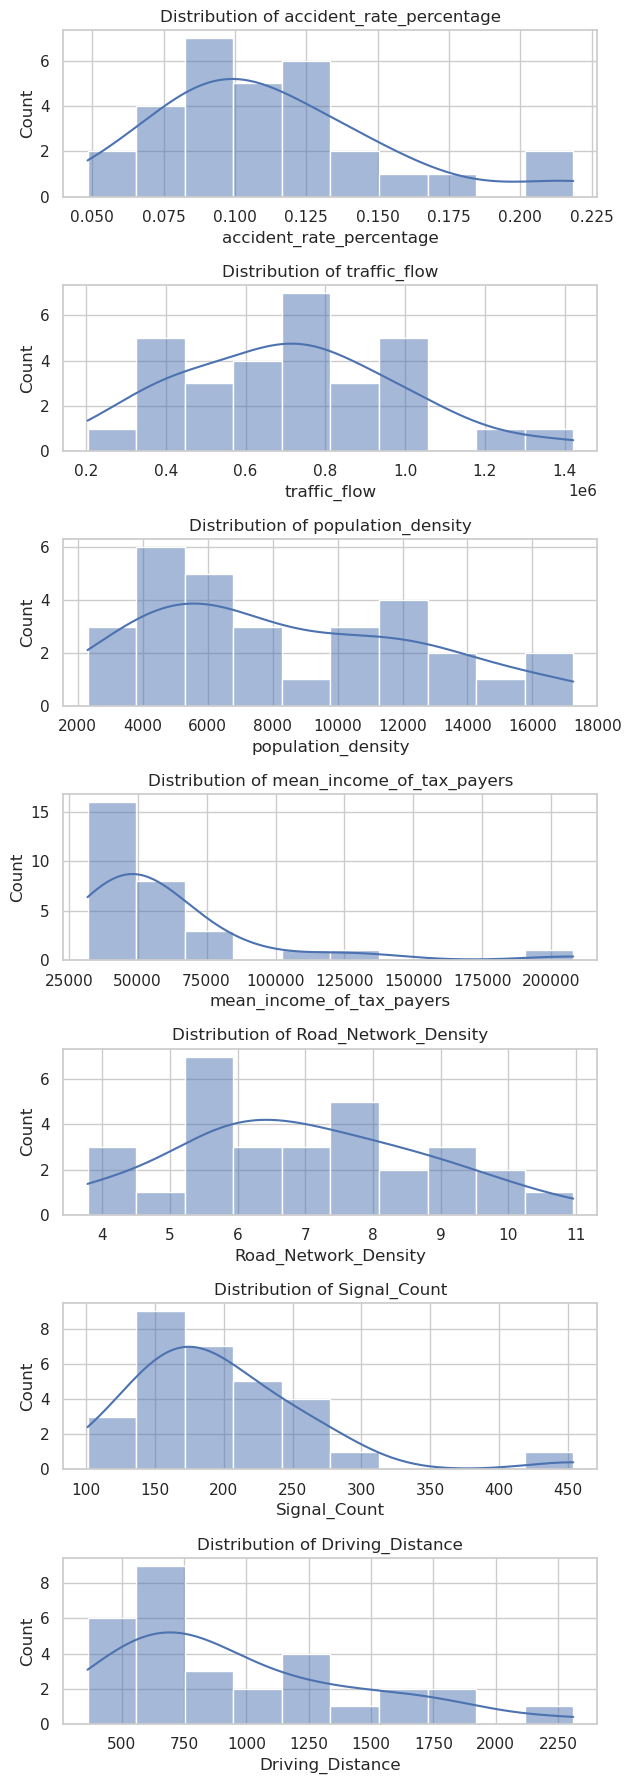

In [70]:
# 设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10)
    plt.title(f'Distribution of {var}')
    
 

# 调整布局
plt.tight_layout()
plt.show()

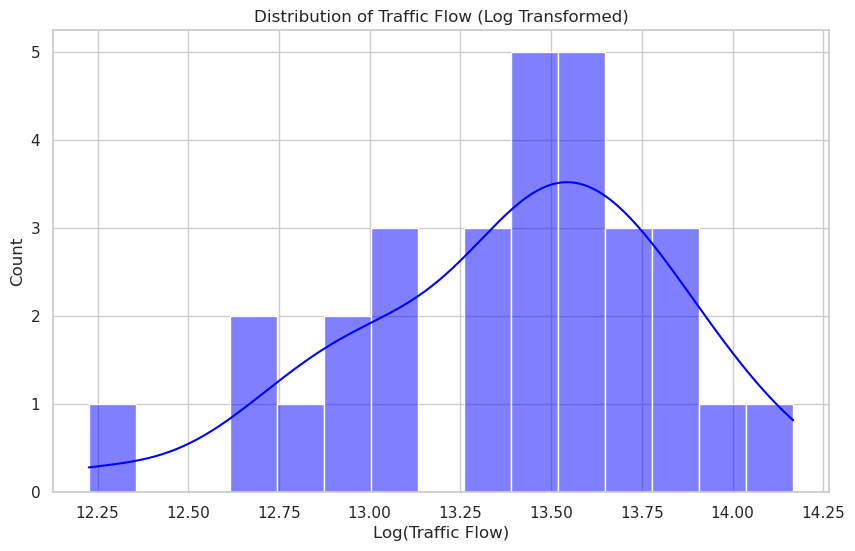

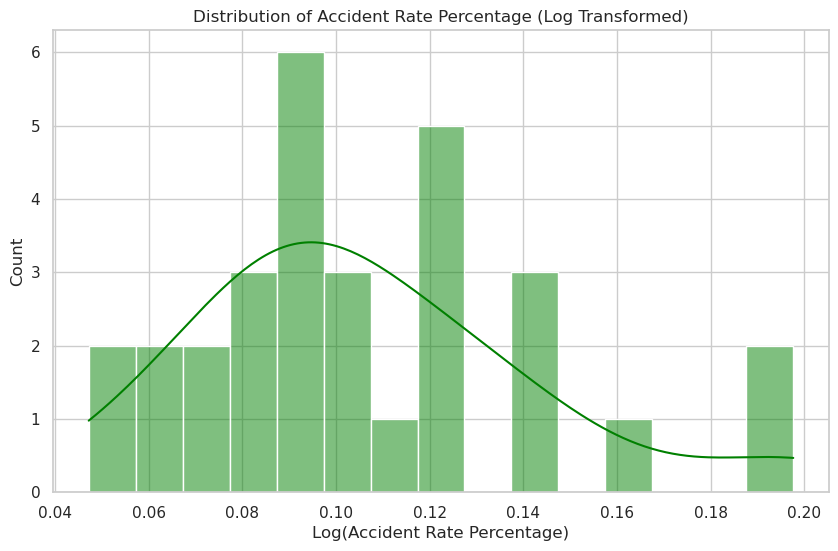

In [76]:
import numpy as np

df_unique['traffic_flow_log'] = np.log1p(df_unique['traffic_flow'])  # log1p 避免 log(0) 问题
df_unique['accident_rate_percentage_log'] = np.log1p(df_unique['accident_rate_percentage'])


import matplotlib.pyplot as plt
import seaborn as sns

# 绘制 log 变换后的 traffic_flow 分布
plt.figure(figsize=(10, 6))
sns.histplot(df_unique['traffic_flow_log'], kde=True, bins=15, color="blue")
plt.title("Distribution of Traffic Flow (Log Transformed)")
plt.xlabel("Log(Traffic Flow)")
plt.ylabel("Count")
plt.show()

# 绘制 log 变换后的 accident_rate_percentage 分布
plt.figure(figsize=(10, 6))
sns.histplot(df_unique['accident_rate_percentage_log'], kde=True, bins=15, color="green")
plt.title("Distribution of Accident Rate Percentage (Log Transformed)")
plt.xlabel("Log(Accident Rate Percentage)")
plt.ylabel("Count")
plt.show()
